In [1]:
# importation des biblio
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
# lecture des donnes 
data=pd.read_csv('data.csv')
data

,Temperature,Rendement
0,100,45
1,110,51
2,120,54
3,130,61
4,140,66
5,150,70
6,160,74
7,170,78
8,180,85
9,190,89


In [4]:
type(data)
data.tail()
x=data.iloc[:,0]
y=data.iloc[:,1]

In [5]:
x,y

(0    100
 1    110
 2    120
 3    130
 4    140
 5    150
 6    160
 7    170
 8    180
 9    190
 Name: Temperature, dtype: int64,
 0    45
 1    51
 2    54
 3    61
 4    66
 5    70
 6    74
 7    78
 8    85
 9    89
 Name: Rendement , dtype: int64)

In [6]:
# moyenn de x y 
print(x.mean())
print(y.mean())

145.0
67.3


In [7]:
# fonction qui calcule la moyenne de x et y 
def getMoy(v):
    return 1/len(v)*sum(v)

print(getMoy(x))
print(getMoy(y))

145.0
67.3


In [8]:
# fonction qui calcule la variance 
def getVar(v):
    return 1/len(v)*sum(np.square(v-getMoy(v)))

print(getVar(x))
print(getVar(y))

825.0
193.20999999999998


In [9]:
#fonction qui calcule la covariance 
def getCov(v1,v2):
    return 1/len(v1)*sum((v1-getMoy(v1))*(v2-getMoy(v2)))

print (getCov(x,y))

398.5


In [11]:
# calcule de beta0 et beta1
def getBeta1(x,y):
    return getCov(x,y)/getVar(x)    
    
def getBeta0(x,y):
    return getMoy(y)-getBeta1(x,y)*getMoy(x)

print(getBeta0(x,y))
print(getBeta1(x,y))

-2.739393939393949
0.48303030303030303


In [14]:
# détermination de la droite de régression Y
beta0 = getBeta0(x,y)
beta1 = getBeta1(x,y)
print("La droite de régression est : Y = " + str(beta0) + " + (" + str(beta1) + ")*x")

La droite de régression est : Y = -2.739393939393949 + (0.48303030303030303)*x


In [15]:
# calcule de y(x)
def Y(x,v1,v2):
    return getBeta0(v1,v2)+getBeta1(v1,v2)*x

print(Y(122,x,y))

56.19030303030302


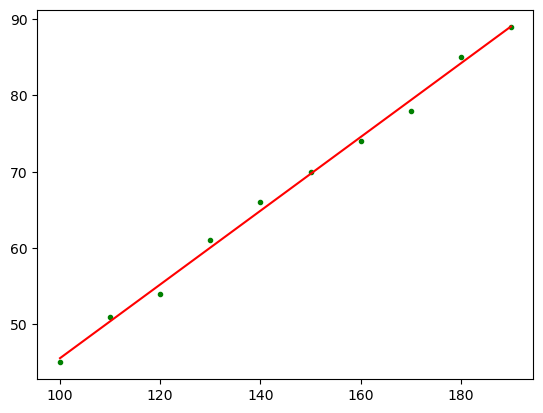

In [24]:
#dresser la droite de regression
plt.plot(x, y,'.',color='g')
plt.plot(x, Y(x,x,y),color='r')

In [25]:
# la fonction de l'erreur 
def getError(v1,v2):
    return sum(np.square(v2-Y(v1,v1,v2)))

print(getError(x,y))

7.224242424242385


In [26]:
#le coefficient de correlation
def getCoeffCorr(v1,v2):
    return getCov(v1,v2)/(np.sqrt(getVar(v1))*np.sqrt(getVar(v2)))

print("r ="+str(getCoeffCorr(x,y)))

r =0.9981287179618071


In [29]:
# Le coefficient de determination 
def getCoeffDet(v1,v2):
    return np.square(getCoeffCorr(v1,v2))

print("R2 ="+str(getCoeffDet(x,y)))

R2 =0.9962609376200807


In [30]:
#ajouter des données 
v1=pd.Series([105,180])
v2=pd.Series([70,70])
x2=pd.concat([v1,x],ignore_index=True)
y2=pd.concat([v2,y],ignore_index=True)

In [31]:
x2,y2

(0     105
 1     180
 2     100
 3     110
 4     120
 5     130
 6     140
 7     150
 8     160
 9     170
 10    180
 11    190
 dtype: int64,
 0     70
 1     70
 2     45
 3     51
 4     54
 5     61
 6     66
 7     70
 8     74
 9     78
 10    85
 11    89
 dtype: int64)

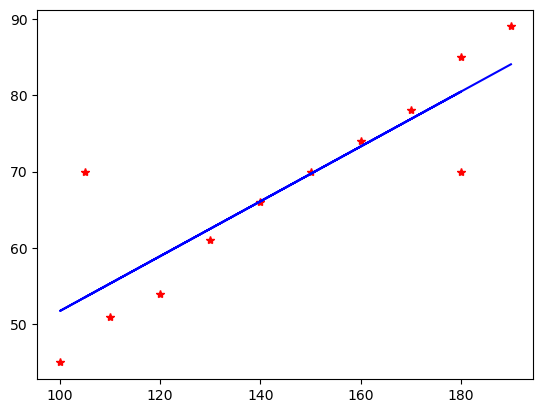

In [32]:
plt.plot(x2,y2,"*",color="red")
plt.plot(x2,Y(x2,x2,y2),color="blue")

In [33]:
#recalculer le coeff de determination 
print("Le nouveau R2="+str(getCoeffDet(x2,y2)))

Le nouveau R2=0.7334777477210158
